In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv("Resources/mouse_drug_data.csv")
clinical_trial = pd.read_csv("Resources/clinicaltrial_data.csv")
# mouse_drug.head()
# clinical_trial.head()

# Double-check for any null values: answer: there are no nulls.
# mouse_drug.info()
# clinical_trial.info()

# Combine the data into a single dataset
merged_mouseID = clinical_trial.merge(mouse_drug, on='Mouse ID')

# Display the data table for preview
# merged_mouseID.head()
# Visually, the merged table shows the effectiveness of each drug to shrink tumors over time.
# Re-organize data to start at time=0 with mouse ID in alphabetical order and reset+drop index.
sorted_merged_mouseID = merged_mouseID.sort_values(by=['Timepoint','Mouse ID']).reset_index(drop=True)
sorted_merged_mouseID.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,a203,0,45.0,0,Infubinol
1,a251,0,45.0,0,Infubinol
2,a262,0,45.0,0,Placebo
3,a275,0,45.0,0,Ceftamin
4,a366,0,45.0,0,Stelasyn


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
tumor_df_mean = pd.DataFrame(sorted_merged_mouseID.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)'])
tumor_vol_avg = tumor_df_mean.reset_index()
tumor_vol_avg.head()
# -----------------------------------------------------------------------------
# If keeping the index
tumor_df_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
tumor_df_stderr = pd.DataFrame(sorted_merged_mouseID.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)'])
tumor_vol_sem = tumor_df_stderr.reset_index()
tumor_vol_sem.head()
# -----------------------------------------------------------------------------
# If keeping the index
tumor_df_stderr.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivoted_drug_mean = tumor_vol_avg.pivot(index='Timepoint',
                                              columns='Drug',
                                              values='Tumor Volume (mm3)')
pivoted_drug_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivoted_drug_sem = tumor_vol_sem.pivot(index='Timepoint',
                                              columns='Drug',
                                              values='Tumor Volume (mm3)')
pivoted_drug_sem.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


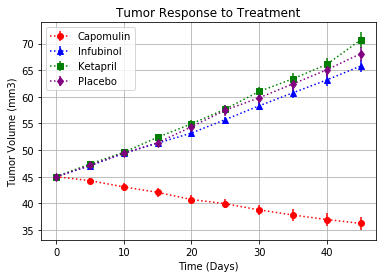

In [6]:
# Generate the Plot (with Error Bars)
# Save the Figure
x_axis = pivoted_drug_mean.index

y_axis_capomulin = pivoted_drug_mean['Capomulin']
y_axis_infubinol = pivoted_drug_mean['Infubinol']
y_axis_ketapril = pivoted_drug_mean['Ketapril']
y_axis_placebo = pivoted_drug_mean['Placebo']

plt.errorbar(x_axis, y_axis_capomulin, yerr=pivoted_drug_sem['Capomulin'],
            color='red', marker='o', linestyle=':')
plt.errorbar(x_axis, y_axis_infubinol, yerr=pivoted_drug_sem['Infubinol'],
            color='blue', marker='^', linestyle=':')
plt.errorbar(x_axis, y_axis_ketapril, yerr=pivoted_drug_sem['Ketapril'],
            color='green', marker='s', linestyle=':')
plt.errorbar(x_axis, y_axis_placebo, yerr=pivoted_drug_sem['Placebo'],
            color='purple', marker='d', linestyle=':')

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.grid()

plt.savefig('Pymaceuticals_Tumor_Response.png',bbox_inches='tight')

plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
metastatic_site_mean = pd.DataFrame(sorted_merged_mouseID.groupby(['Drug','Timepoint']).mean()['Metastatic Sites'])
metastatic_site_avg = metastatic_site_mean.reset_index()
metastatic_site_avg.head()
# -----------------------------------------------------------------------------
# If keeping the index
metastatic_site_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
metastatic_site_stderr = pd.DataFrame(sorted_merged_mouseID.groupby(['Drug','Timepoint']).sem()['Metastatic Sites'])
metastatic_site_sem = metastatic_site_stderr.reset_index()
metastatic_site_sem.head()
# -----------------------------------------------------------------------------
# If keeping the index
metastatic_site_stderr.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivoted_drug_meta_mean = metastatic_site_avg.pivot(index='Timepoint',
                                              columns='Drug',
                                              values='Metastatic Sites')
pivoted_drug_meta_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
pivoted_drug_meta_sem = metastatic_site_sem.pivot(index='Timepoint',
                                              columns='Drug',
                                              values='Metastatic Sites')
pivoted_drug_meta_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


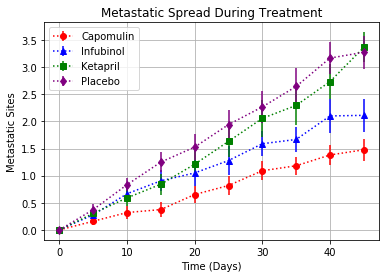

In [11]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
x_axis_meta = pivoted_drug_meta_mean.index

y_axis_meta_capo = pivoted_drug_meta_mean['Capomulin']
y_axis_meta_infu = pivoted_drug_meta_mean['Infubinol']
y_axis_meta_keta = pivoted_drug_meta_mean['Ketapril']
y_axis_meta_plac = pivoted_drug_meta_mean['Placebo']

plt.errorbar(x_axis, y_axis_meta_capo, yerr=pivoted_drug_meta_sem['Capomulin'],
            color='red', marker='o', linestyle=':')
plt.errorbar(x_axis, y_axis_meta_infu, yerr=pivoted_drug_meta_sem['Infubinol'],
            color='blue', marker='^', linestyle=':')
plt.errorbar(x_axis, y_axis_meta_keta, yerr=pivoted_drug_meta_sem['Ketapril'],
            color='green', marker='s', linestyle=':')
plt.errorbar(x_axis, y_axis_meta_plac, yerr=pivoted_drug_meta_sem['Placebo'],
            color='purple', marker='d', linestyle=':')

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc='best')
plt.grid()

plt.savefig('Pymaceuticals_Metastatic_Spread.png',bbox_inches='tight')

plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
mouse_count = pd.DataFrame(sorted_merged_mouseID.groupby(['Drug','Timepoint']).count()['Mouse ID'])
mouse_count_no_index = mouse_count.reset_index()
mouse_count_no_index.head()
# -----------------------------------------------------------------------------
# If keeping the index
mouse_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
pivoted_mouse_count_df = mouse_count_no_index.pivot(index='Timepoint',
                                              columns='Drug',
                                              values='Mouse ID')
pivoted_mouse_count_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


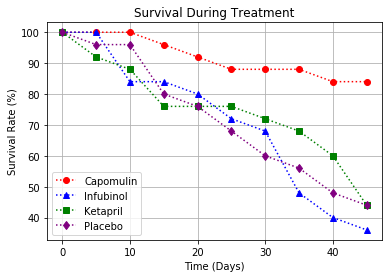

In [14]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
x_axis = pivoted_mouse_count_df.index

y_axis_mouse_capo = pivoted_mouse_count_df['Capomulin']
y_axis_mouse_infu = pivoted_mouse_count_df['Infubinol']
y_axis_mouse_keta = pivoted_mouse_count_df['Ketapril']
y_axis_mouse_plac = pivoted_mouse_count_df['Placebo']

plt.errorbar(x_axis, y_axis_mouse_capo/25*100,
            color='red', marker='o', linestyle=':')
plt.errorbar(x_axis, y_axis_mouse_infu/25*100,
            color='blue', marker='^', linestyle=':')
plt.errorbar(x_axis, y_axis_mouse_keta/25*100,
            color='green', marker='s', linestyle=':')
plt.errorbar(x_axis, y_axis_mouse_plac/25*100,
            color='purple', marker='d', linestyle=':')

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='top left')
plt.grid()

plt.savefig('Pymaceuticals_Mice_Survival.png',bbox_inches='tight')

plt.show()




## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
# Display the data to confirm
drug_percent_change = ((pivoted_drug_mean.loc[45,:] - pivoted_drug_mean.loc[0,:]) / pivoted_drug_mean.loc[0,:]) * 100
# You can probably also do iloc[0] at tp=0 and iloc[-1] at tp=45
drug_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

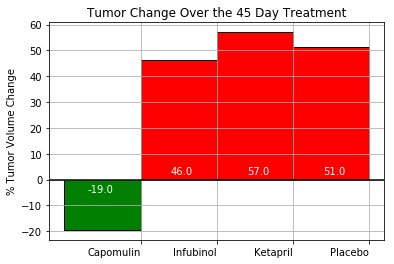

In [16]:
# Store all Relevant Percent Changes into a list
x_bar_list = ['Capomulin','Infubinol','Ketapril','Placebo']
y_bar_list = []
for x in x_bar_list:
    for drug in drug_percent_change.index:
        if x == drug:
            #print(x)
            #print("{0:.0f}".format(drug_percent_change[x]))
            y_bar_list.append(drug_percent_change[x])
            #print(y_bar_list)
            
# Splice the data between passing and failing drugs
color_bar = ['red' if y > 0 else 'green' for y in y_bar_list]
# Orient widths. Add labels, tick marks, etc. 
plt.bar(x_bar_list, y_bar_list,
        width=-1, align='edge', color=color_bar, edgecolor='black')
plt.title('Tumor Change Over the 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
xlabel = drug_percent_change.index
plt.xticks(ha='right')
plt.axhline(color='black')

#Jimmy-rigging the y-axis' values text into each bar....
plt.text(-0.7,-5,round(y_bar_list[0]), color='white')
plt.text(0.4,2,round(y_bar_list[1]), color='white')
plt.text(1.4,2,round(y_bar_list[2]), color='white')
plt.text(2.4,2,round(y_bar_list[3]), color='white')

plt.grid()
# Use functions to label the percentages of changes
# Call functions to implement the function calls


# Save the Figure
plt.savefig('Pymaceuticals_Drug_Effectiveness.png',bbox_inches='tight')

# Show the Figure
plt.show()

# Pymaceuticals Data Analysis
In a data comparison among three different clinical drugs--Capomulin, Infubinol, and Ketapril--the results for Capomulin seem to be the most promising. Over the course of the 45-day mouse clinical trials, mice dosed with Capomulin showed a decrease in tumor volume at a -19% change since day 0 while the other drugs--Infubinol and Ketapril--as well as the placebo showed signs of tumor malignancy (continued growth). The metastatic spread of the tumors in Capomulin-dosed mice were the smallest compared to the other clinical drugs which proves Capomulin's effectiveness in hindering tumor growth in mice. Further analysis of Capomulin's effects also show that the survival rates of the mice were among the highest.

On the other hand, Ketapril generated horrible results showing the opposite of what was intended for these clinical trials. Ketapril-dosed mice showed and increase in tumor volume at 57% (6% greater than a placebo trial) since day 0. The metastatic site spread was high which is similar to that of the placebo trials. Even the mortality rate of the mice were also high where just about a little more than half of the ketapril-dosed mice has passed.

Similarly to Ketapril, Infubinol also showed somewhat negative results in hindering tumor growth in mice. Although Infubinol performed much better than the placebo trials, the survival rate of the mice were less than that of the placebo mice. This particlar data may need further research as there may have been an outlier or other factors that caused the high mortality rate of the infubinol-dosed mice despite showing slight improvements over the placebos.

In any case, of the three drugs, Capomulin may move onto the next phase of the clinical trials to test further effectiveness of the drug.